# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
pd.set_option('display.max_columns', 300)
pd.get_option("display.max_rows")
pd.set_option('display.max_rows', 300)

import matplotlib.pyplot as plt
%matplotlib inline

import os
from os.path import join as opj
import gc

INPUT_PATH = '../../input/feedback-prize-english-language-learning/'

In [2]:
train_df = pd.read_csv(opj(INPUT_PATH, 'train.csv'))
test_df = pd.read_csv(opj(INPUT_PATH, 'test.csv'))
sub_df = pd.read_csv(opj(INPUT_PATH, 'sample_submission.csv'))

print('train_df.shape = ', train_df.shape)
print('test_df.shape = ', test_df.shape)
print('sub_df.shape = ', sub_df.shape)

train_df.shape =  (3911, 8)
test_df.shape =  (3, 2)
sub_df.shape =  (3, 7)


# Look at Data

In [3]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


# EDA

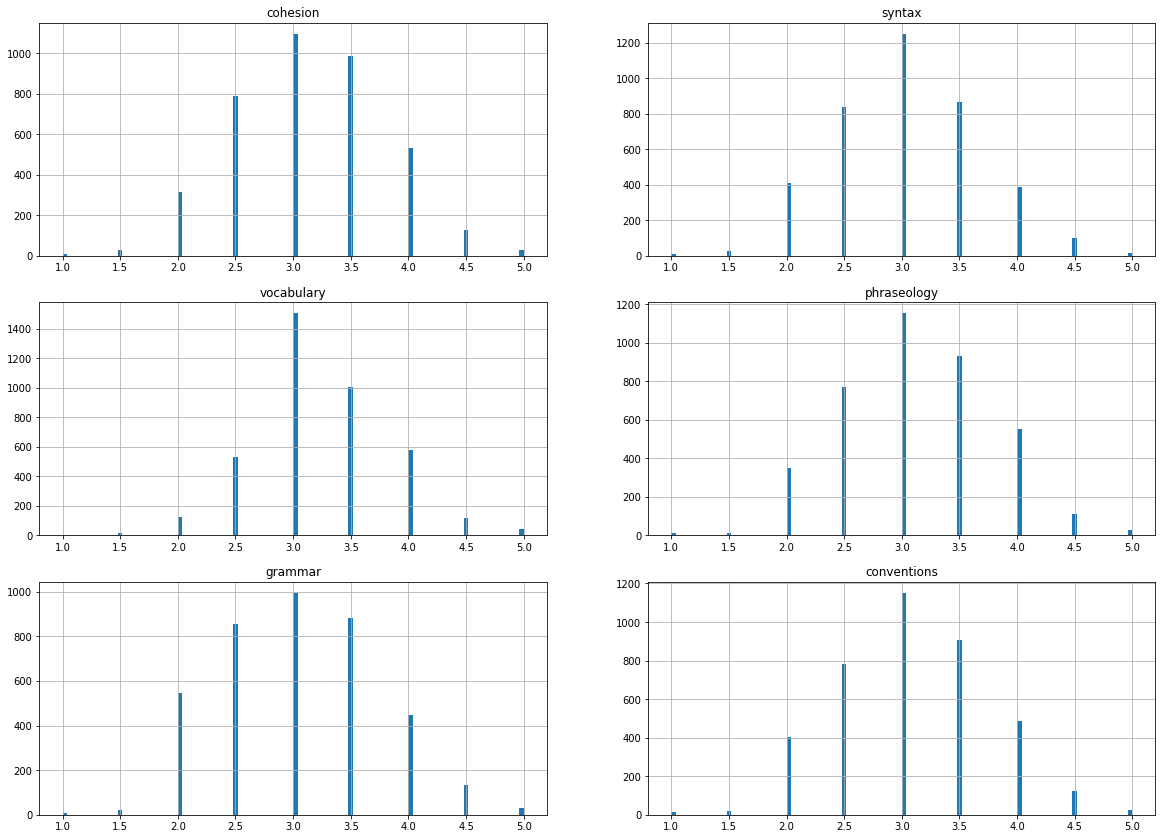

In [4]:
cols = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']

plt.figure(figsize=(20,30))
for i,col in enumerate(cols):
    plt.subplot(6,2,i+1)
    plt.hist(train_df[col], bins=100)
    plt.title(col)
    plt.grid()
plt.show()

# Check Corr for Sampled Batches

In [5]:
cols = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']
train_df[cols].corr()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000


In [13]:
BATCH_SIZE = 16
N_ITE = 3

corr = 0
for i in range(N_ITE):
    corr += train_df.sample(BATCH_SIZE, random_state=i, replace=False)[cols].corr() / N_ITE
corr

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.000000,0.663969,0.565583,0.677649,0.573328,0.795747
syntax,0.663969,1.000000,0.494967,0.694139,0.646548,0.609624
vocabulary,0.565583,0.494967,1.000000,0.678641,0.471710,0.510894
phraseology,0.677649,0.694139,0.678641,1.000000,0.624424,0.655099
grammar,0.573328,0.646548,0.471710,0.624424,1.000000,0.652412
conventions,0.795747,0.609624,0.510894,0.655099,0.652412,1.000000
